In [1]:
# magics: ensures that any changes to the modules loaded below will be re-loaded automatically
%load_ext autoreload
%autoreload 2

# load general packages
import sys 
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
sys.path.append(r'/Users/asbjornfyhn/Desktop/Dyn Prog/DP-life-cycle')

In [49]:
# Import EGM model
import utils as ex2
import egm as egm
import time_iterations as ti

# Setup
par_EGM = ex2.setup()
sol = egm.solve_EGM(par_EGM, vector=False)
sol_ti = ti.solve_ti(par_EGM)


/Users/asbjornfyhn/Desktop/Dyn Prog/DP-life-cycle/utils.py:9: RuntimeWarning: invalid value encountered in power
  return c**(-par.rho)


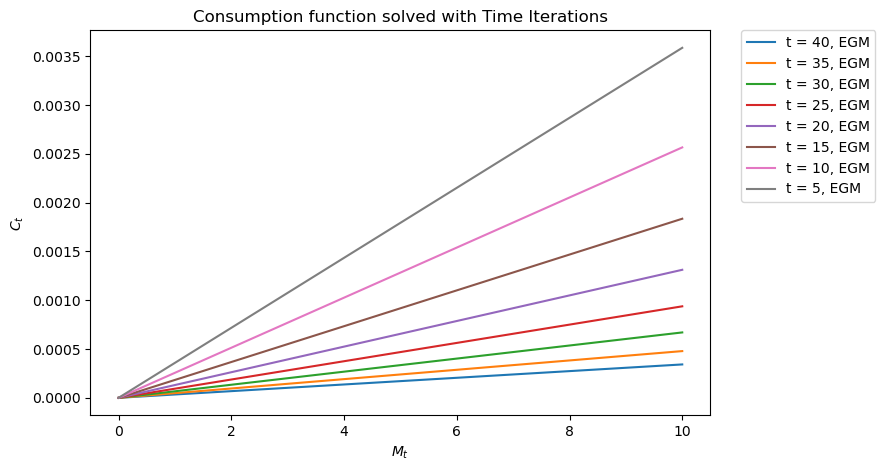

In [50]:
# Print consumption function
fig = plt.figure(figsize=(8,5))# figsize is in inches...
ax = fig.add_subplot(1,1,1)
for t in range(par_EGM.Tr_N-1,1,-5):
    ax.plot(par_EGM.grid_xhat,sol_ti.C[:,t],  label=f"t = {t + 1}, EGM",  linestyle='-')
ax.set_xlabel(f"$M_t$")
ax.set_ylabel(f"$C_t$")
ax.set_title(f'Consumption function solved with Time Iterations')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

In [ ]:
interp = interpolate.interp1d(par_EGM.grid_xhat,par_EGM.gamma1*par_EGM.grid_xhat, bounds_error=False, fill_value = "extrapolate") 
c = np.linspace(par_EGM.grid_xhat[0],par_EGM.grid_xhat[-1],100)
# if c-xhat is negative, then the value is zero
# np.maximum(c-par_EGM.grid_xhat,0)
c = np.where(c-par_EGM.grid_xhat[:,None]<0,par_EGM.grid_xhat,c)
# subtract each c from the grid_xhat and multiply by R
xhat_next = par_EGM.R * (par_EGM.grid_xhat[:,None] - c)
# c_next = interp(xhat_next)
# ex2.marg_util(c_next,par_EGM)

In [ ]:
# Print consumption function
fig = plt.figure(figsize=(8,5))# figsize is in inches...
ax = fig.add_subplot(1,1,1)
for t in range(par_EGM.Tr_N-2,1,-5):
    ax.plot(par_EGM.grid_xhat,sol.C[:,t],  label=f"t = {t + 1}, EGM",  linestyle='-')
ax.set_xlabel(f"$M_t$")
ax.set_ylabel(f"$C_t$")
ax.set_title(f'Consumption function')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()